<a href="https://colab.research.google.com/github/zjzsu2000/CMPE297_Sec49AdvanceDL/blob/master/Assignment_4/Assignment_4_b)meta_learning_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assigntment_4_b)meta_learning_task



refs:
* https://learning.oreilly.com/library/view/hands-on-meta-learning/9781789534207/920f24f5-4b55-4057-8af0-0a8e8fcd9a05.xhtml
* https://github.com/sudharsan13296/Hands-On-Meta-Learning-With-Python

### What is meta-learning?
Meta Learning is currently an exciting research in the field of artificial intelligence. With the help of powerful algorithms (such as generative adversarial networks, capsule networks, etc.), deep learning has achieved rapid development. But the problem with deep neural networks is that we need a lot of training to train the model, and when we have the model, it will suddenly fail. Few data points. Suppose you have trained a deep learning model to perform some task A. Now, when you have a new task B that is closely related to A, you cannot use the same model. We need to train the model for task B from scratch. Therefore, for each task, we need to train the model from scratch, although they may be related.

Meta-learning produces a general AI model that can learn to perform various tasks without the need for training from scratch. We use very few data points to train our meta-learning model on various related tasks, so for new related tasks, it can use the learning from previous tasks instead of training from scratch. Many researchers and scientists believe that meta-learning can bring us closer to achieving artificial intelligence.

In [76]:
import os
import glob
from PIL import Image

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

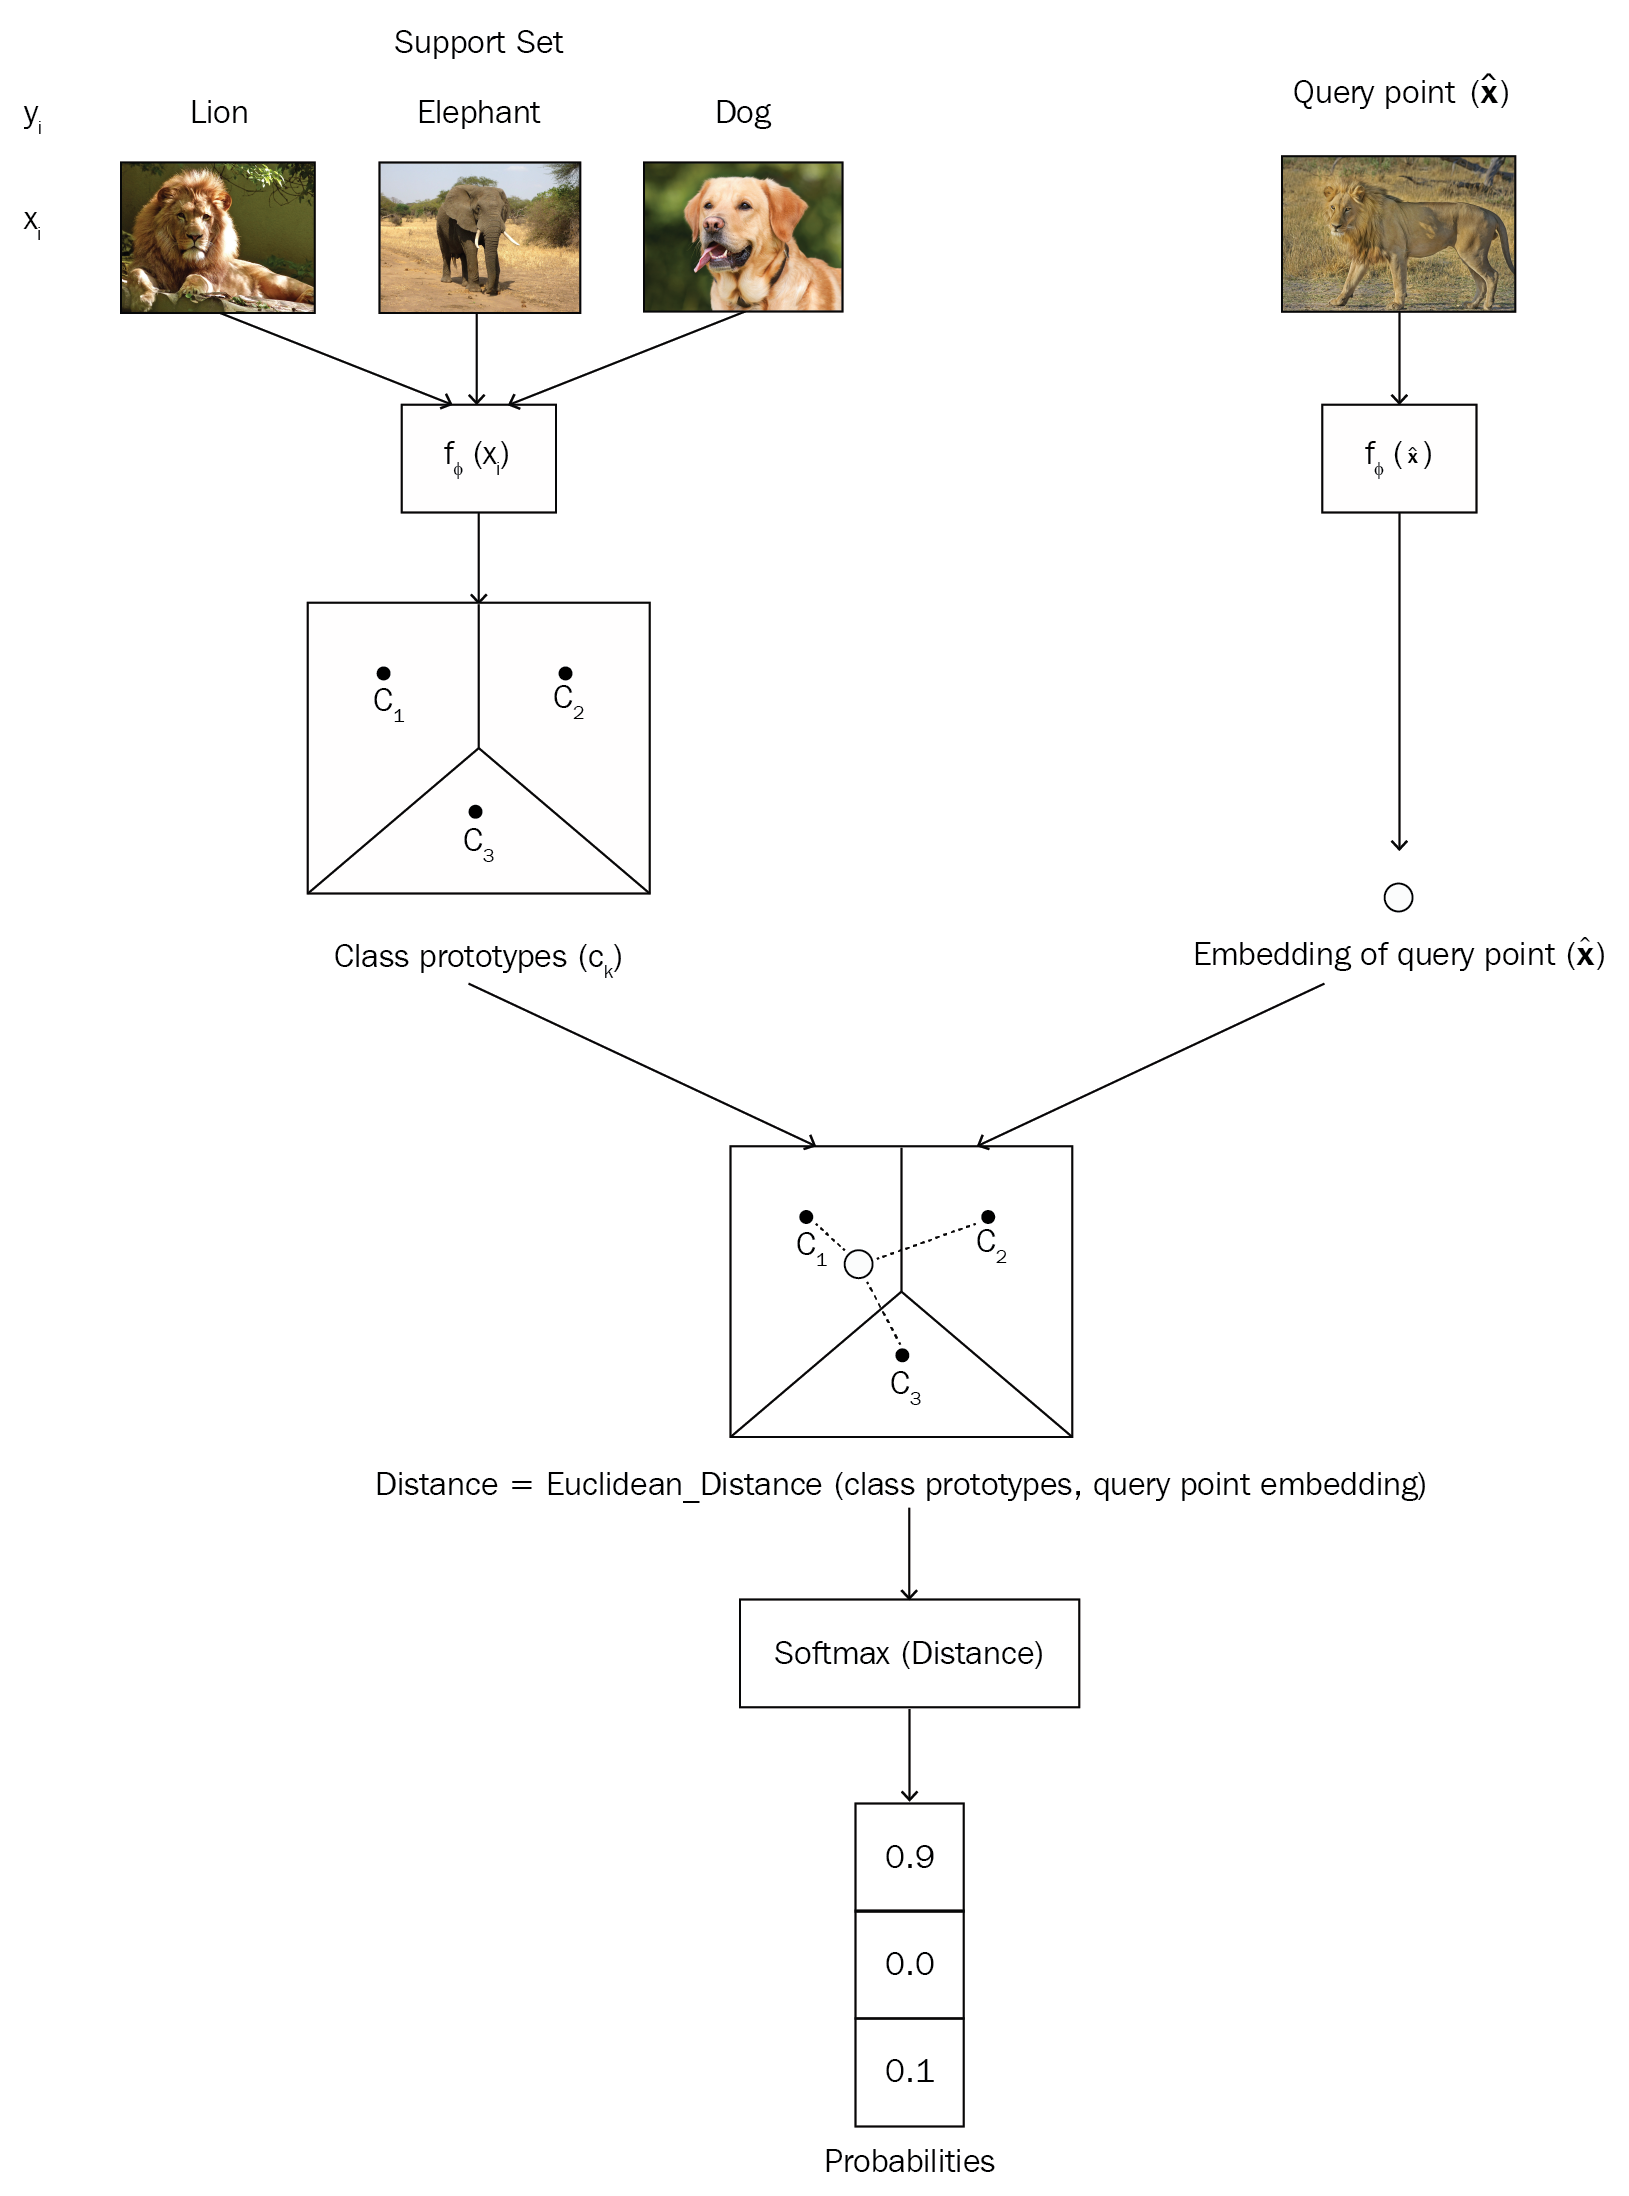

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [100]:
print(tf.__version__)

2.1.0


In [5]:
!git clone https://github.com/sudharsan13296/Hands-On-Meta-Learning-With-Python

Cloning into 'Hands-On-Meta-Learning-With-Python'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 34772 (delta 0), reused 0 (delta 0), pack-reused 34769
Receiving objects: 100% (34772/34772), 27.99 MiB | 10.22 MiB/s, done.
Resolving deltas: 100% (48/48), done.
Checking out files: 100% (32982/32982), done.


In [7]:
!ls

gdrive	Hands-On-Meta-Learning-With-Python  sample_data


In [11]:
%cd Hands-On-Meta-Learning-With-Python

[Errno 2] No such file or directory: 'Hands-On-Meta-Learning-With-Python/03. Prototypical Networks and its Variants'
/content/Hands-On-Meta-Learning-With-Python


In [14]:
%cd 03\.\ Prototypical\ Networks\ and\ its\ Variants

/content/Hands-On-Meta-Learning-With-Python/03. Prototypical Networks and its Variants


## Data Visualization

In [39]:
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 


<Figure size 432x288 with 0 Axes>

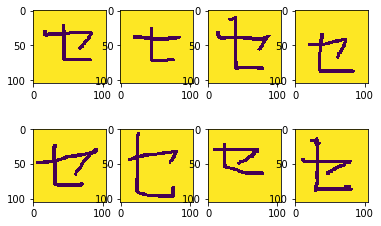

In [51]:
plt.figure() 
f, axarr = plt.subplots(2,4) 
for i in range(8):
  img = mpimg.imread('data/images/Japanese_(katakana)/character13/0608_0'+str(i+1)+'.png')     
  axarr[i/4,i%4].imshow(img)

<Figure size 432x288 with 0 Axes>

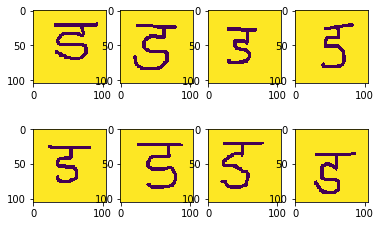

In [53]:
plt.figure() 
f, axarr = plt.subplots(2,4) 
for i in range(8):
  img = mpimg.imread('data/images/Sanskrit/character13/0863_0'+str(i+1)+'.png')     
  axarr[i/4,i%4].imshow(img)

## convert image into an array and reshape to 28*28

In [59]:
image_path = 'data/images/Sanskrit/character13/0863_08.png'
alphabet, character, rotation = 'Sanskrit/character13/rot000'.split('/')
rotation = float(rotation[3:])

In [60]:
np.array(Image.open(image_path).rotate(rotation).resize((28, 28)), np.float32,copy=True)

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1

## Data preprocessing

In [61]:
root_path = '/content/Hands-On-Meta-Learning-With-Python/03. Prototypical Networks and its Variants/data/'

In [63]:
train_split_path = os.path.join(root_path, 'splits', 'train.txt')

with open(train_split_path, 'r') as train_split:
    train_classes = [line.rstrip() for line in train_split.readlines()]

In [68]:
number_of_classes = len(train_classes)

print('Numbers of classes is :',number_of_classes)

('Numbers of classes is :', 4112)


Now we set the number of examples to 20, as we have 20 example per class in our dataset, and also we set image width and height to 28 x 28:

In [69]:
#number of examples
num_examples = 20

#image width
img_width = 28

#image height
img_height = 28
channels = 1

In [70]:
train_dataset = np.zeros([number_of_classes, num_examples, img_height, img_width], dtype=np.float32)

In [71]:
train_dataset.shape

(4112, 20, 28, 28)

In [ ]:
for label, name in enumerate(train_classes):
    alphabet, character, rotation = name.split('/')
    rotation = float(rotation[3:])
    img_dir = os.path.join(root_dir, 'data', alphabet, character)
    img_files = sorted(glob.glob(os.path.join(img_dir, '*.png')))
  
    
    for index, img_file in enumerate(img_files):
        values = 1. - np.array(Image.open(img_file).rotate(rotation).resize((img_width, img_height)), np.float32, copy=False)
        train_dataset[label, index] = values

In [72]:
train_dataset.shape

(4112, 20, 28, 28)

## Build model

In [140]:
def convolution_block(inputs, out_channels, name='conv'):
    conv = tf.layers.conv2d(inputs, out_channels, kernel_size=3, padding='SAME')
    conv = tf.keras.layers.BatchNormalization()(conv)
    conv = tf.keras.layers.Activation('relu')(conv)
    conv = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(conv)
    return conv

def get_embeddings(support_set, h_dim, z_dim, reuse=False):
        net = convolution_block(support_set, h_dim)
        net = convolution_block(net, h_dim)
        net = convolution_block(net, h_dim) 
        net = convolution_block(net, z_dim) 
        net = tf.keras.layers.Flatten()(net)        
        return net

In [74]:
#number of classes
num_way = 60  

#number of examples per class for support set
num_shot = 5  

#number of query points
num_query = 5 

#number of examples
num_examples = 20

h_dim = 64

z_dim = 64

In [80]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()


W1027 04:35:12.664396 140022456440704 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/tensorflow_core/python/compat/v2_compat.py:88: disable_resource_variables (from tensorflow.python.ops.variable_scope) is deprecated and will be removed in a future version.
Instructions for updating:
non-resource variables are not supported in the long term


In [81]:
support_set = tf.placeholder(tf.float32, [None, None, img_height, img_width, channels])
query_set = tf.placeholder(tf.float32, [None, None, img_height, img_width, channels])

In [82]:
support_set_shape = tf.shape(support_set)
query_set_shape = tf.shape(query_set)

In [83]:
num_classes, num_support_points = support_set_shape[0], support_set_shape[1]

In [84]:
num_query_points = query_set_shape[1]

In [85]:
y = tf.placeholder(tf.int64, [None, None])

#convert the label to one hot
y_one_hot = tf.one_hot(y, depth=num_classes)

In [141]:
support_set_embeddings = get_embeddings(tf.reshape(support_set, [num_classes * num_support_points, img_height, img_width, channels]), h_dim, z_dim)

In [142]:
embedding_dimension = tf.shape(support_set_embeddings)[-1]

class_prototype = tf.reduce_mean(tf.reshape(support_set_embeddings, [num_classes, num_support_points, embedding_dimension]), axis=1)

In [143]:
query_set_embeddings = get_embeddings(tf.reshape(query_set, [num_classes * num_query_points, img_height, img_width, channels]), h_dim, z_dim, reuse=True)

In [144]:
def euclidean_distance(a, b):

    N, D = tf.shape(a)[0], tf.shape(a)[1]
    M = tf.shape(b)[0]
    a = tf.tile(tf.expand_dims(a, axis=1), (1, M, 1))
    b = tf.tile(tf.expand_dims(b, axis=0), (N, 1, 1))
    return tf.reduce_mean(tf.square(a - b), axis=2)


In [145]:
distance = euclidean_distance(class_prototype,query_set_embeddings)

## Predict

In [146]:
predicted_probability = tf.reshape(tf.nn.log_softmax(-distance), [num_classes, num_query_points, -1])

### Compute the loss

In [147]:
loss = -tf.reduce_mean(tf.reshape(tf.reduce_sum(tf.multiply(y_one_hot, predicted_probability), axis=-1), [-1]))

In [151]:
loss

<tf.Tensor 'Neg_1:0' shape=() dtype=float32>

### Calculate accuracy

In [150]:
accuracy = tf.reduce_mean(tf.to_float(tf.equal(tf.argmax(predicted_probability, axis=-1), y)))

## Using Adam optimizer to train

In [153]:
train = tf.train.AdamOptimizer().minimize(loss)

In [154]:
sess = tf.InteractiveSession()
init = tf.global_variables_initializer()
sess.run(init)

In [155]:
num_epochs = 20
num_episodes = 100

In [157]:
for epoch in range(num_epochs):
    
    for episode in range(num_episodes):
        
        # select 10 classes
        episodic_classes = np.random.permutation(number_of_classes)[:10]
        
        support = np.zeros([10, num_shot, img_height, img_width], dtype=np.float32)
        
        query = np.zeros([10, num_query, img_height, img_width], dtype=np.float32)
        
        
        for index, class_ in enumerate(episodic_classes):
            selected = np.random.permutation(num_examples)[:num_shot + num_query]
            support[index] = train_dataset[class_, selected[:num_shot]]
                        
            query[index] = train_dataset[class_, selected[num_shot:]]
            
        support = np.expand_dims(support, axis=-1)
        query = np.expand_dims(query, axis=-1)
        labels = np.tile(np.arange(10)[:, np.newaxis], (1, num_query)).astype(np.uint8)
        _, loss_, accuracy_ = sess.run([train, loss, accuracy], feed_dict={support_set: support, query_set: query, y:labels})
        
        if (episode+1) % 10 == 0:
            print('Epoch {} : Episode {} : Loss: {}, Accuracy: {}'.format(epoch+1, episode+1, loss_, accuracy_))

Epoch 1 : Episode 10 : Loss: 3.91202330589, Accuracy: 0.10000000149
Epoch 1 : Episode 20 : Loss: 3.91202330589, Accuracy: 0.10000000149
Epoch 1 : Episode 30 : Loss: 3.91202330589, Accuracy: 0.10000000149
Epoch 1 : Episode 40 : Loss: 3.91202330589, Accuracy: 0.10000000149
Epoch 1 : Episode 50 : Loss: 3.91202330589, Accuracy: 0.10000000149
Epoch 1 : Episode 60 : Loss: 3.91202330589, Accuracy: 0.10000000149
Epoch 1 : Episode 70 : Loss: 3.91202330589, Accuracy: 0.10000000149
Epoch 1 : Episode 80 : Loss: 3.91202330589, Accuracy: 0.10000000149
Epoch 1 : Episode 90 : Loss: 3.91202330589, Accuracy: 0.10000000149
Epoch 1 : Episode 100 : Loss: 3.91202330589, Accuracy: 0.10000000149
Epoch 2 : Episode 10 : Loss: 3.91202330589, Accuracy: 0.10000000149
Epoch 2 : Episode 20 : Loss: 3.91202330589, Accuracy: 0.10000000149
Epoch 2 : Episode 30 : Loss: 3.91202330589, Accuracy: 0.10000000149
Epoch 2 : Episode 40 : Loss: 3.91202330589, Accuracy: 0.10000000149
Epoch 2 : Episode 50 : Loss: 3.91202330589, Acc